In [1]:
import numpy as np
import pandas as pd
import scipy
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import gridspec
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import ast
import glob
import warnings

In [2]:
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

smaller_size = 13
medium_size = 14
bigger_size = 16

plt.rc('font', size=bigger_size)          # controls default text sizes
plt.rc('axes', titlesize=medium_size)     # fontsize of the axes title
plt.rc('axes', labelsize=medium_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=smaller_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=smaller_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=smaller_size)    # legend fontsize
plt.rc('figure', titlesize=bigger_size)  # fontsize of the figure title


In [3]:
noises = [0, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 0.8]
model_summary_full = pd.read_csv("12_noise_model_summary.csv")
indexes1 = [x in ["True-True", "True-False"] for x in model_summary_full.label]
model_summary = model_summary_full[indexes1]
indexes2 = [x in noises for x in model_summary.noise]
model_summary = model_summary[indexes2]
model_summary.head()

,Unnamed: 0,correlation,mse,noise,label
0,../12_noise/b11_000_noise_0_000,0.903488,0.042247,0.0,True-True
1,../12_noise/b11_000_noise_0_001,0.901147,0.043057,0.0,True-True
3,../12_noise/b11_000_noise_0_003,0.933064,0.028949,0.0,True-True
4,../12_noise/b11_000_noise_0_004,0.878982,0.047720,0.0,True-True
5,../12_noise/b11_000_noise_0_005,0.889355,0.045345,0.0,True-True


In [4]:
whitenoise = pd.read_csv('whitenoise_correlation_subset.csv',index_col=0)
wn_summary = pd.read_csv('whitenoise_summary.csv',index_col=0)

Text(-0.22, 1, 'C')

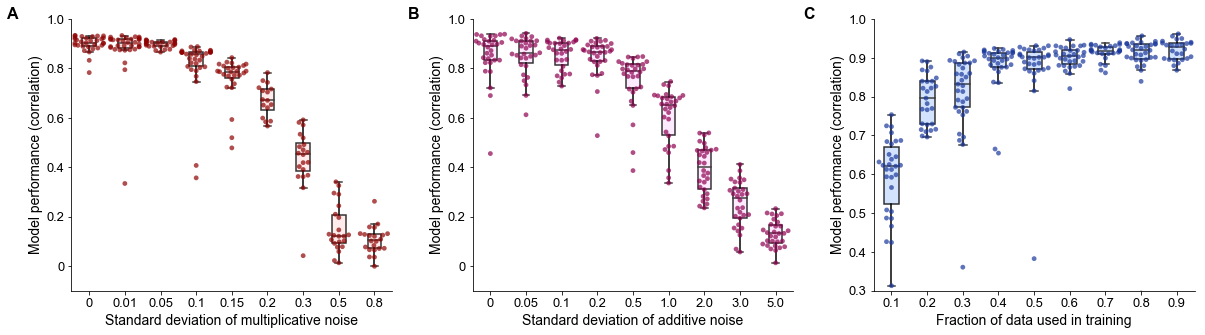

In [5]:
# three panels
fig = plt.figure(figsize=(24, 5)) 
plt.gcf().subplots_adjust(left=0.25, wspace = 0.25)
gs = gridspec.GridSpec(1, 3, width_ratios=[5, 5, 5]) 

ax1 = plt.subplot(gs[0])
#model_summary = pd.read_csv("12_noise/12_noise_model_summary.csv")
sns.boxplot(x="noise", y="correlation", data=model_summary, width=0.38,
                 boxprops=dict(alpha=0.8, color="#FFE7E7", edgecolor="black", linewidth=1.5),
                 whiskerprops=dict(color="black", linewidth=1.5), fliersize=0, ax=ax1)

sns.swarmplot(x="noise", y="correlation", data=model_summary, s=4.8, alpha=0.7, color='#8F0202', ax=ax1)

ax1.set_xlabel("Standard deviation of multiplicative noise")
ax1.set_ylabel("Model performance (correlation)", size=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#ax1.set_ylim(0.7,0.95)
ax1.set_ylim(-0.1,1.0)
ax1.set_xticks(range(len(noises)))
ax1.set_xticklabels(noises)
#ax1.set_yticks([0.7,0.75,0.8,0.85,0.9,0.95])
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
#ax1.set_yticklabels(['0.70','0.75','0.80','0.85','0.90','0.95'], size=14)
ax1.set_yticklabels(['0','0.2','0.4','0.6','0.8','1.0'])
ax1.text(-0.2,1,'A', weight='bold',transform=ax1.transAxes)


ax3 = plt.subplot(gs[1])
sns.boxplot(x="noise", y="correlation", data=whitenoise, width=0.38,
                 boxprops=dict(alpha=0.8, color="#fce7ff", edgecolor="black", linewidth=1.5),
                 whiskerprops=dict(color="black", linewidth=1.5), fliersize=0, ax=ax3)

# sns.swarmplot(x="noise", y="correlation", data=model_summary, 
#               s=4.8, alpha=0.7, color='#8F0202', ax=ax)
sns.swarmplot(x="noise", y="correlation", data=whitenoise, 
              s=4.8, alpha=0.7, color='#8f0250', ax=ax3)

ax3.set_xlabel("Standard deviation of additive noise")
#ax1.set_xlabel("Ratio of noise", size=14)
ax3.set_ylabel("Model performance (correlation)")
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
#ax1.set_ylim(0.7,0.95)
ax3.set_ylim(-0.1,1.0)
wnoises = [0,0.05,0.1,0.2,0.5,1.0,2.0,3.0,5.0]
ax3.set_xticks(range(len(wnoises)))
ax3.set_xticklabels(wnoises)
#ax1.set_yticks([0.7,0.75,0.8,0.85,0.9,0.95])
ax3.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
#ax1.set_yticklabels(['0.70','0.75','0.80','0.85','0.90','0.95'], size=14)
ax3.set_yticklabels(['0','0.2','0.4','0.6','0.8','1.0'])
ax3.text(-0.2,1,'B', weight='bold',transform=ax3.transAxes)


ax2 = plt.subplot(gs[2])
fracs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
model_summary_subset = pd.read_csv("12_subset_model_summary.csv")
indexes1 = [x in ["True-True", "True-False"] for x in model_summary_subset.label]
model_summary_subset = model_summary_subset[indexes1]
sns.swarmplot(x="frac", y="correlation", data=model_summary_subset, s=4.8, alpha=0.7, color='#1A389C', ax=ax2)
sns.boxplot(x="frac", y="correlation", data=model_summary_subset, width=0.42,
                 boxprops=dict(alpha=0.8, color="#C8DCFE", edgecolor="black", linewidth=1.5),
                 whiskerprops=dict(color="black", linewidth=1.5), fliersize=0, ax=ax2)
ax2.set_ylim(0.3,1.0)
ax2.set_xlabel("Fraction of data used in training")
ax2.set_ylabel("Model performance (correlation)")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xticks([0,1,2,3,4,5,6,7,8])
ax2.set_xticklabels([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax2.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax2.set_yticklabels([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax2.text(-0.22,1,'C', weight='bold',transform=ax2.transAxes)

In [6]:
#fig.savefig("Figure4.pdf", format="pdf")